## Imports

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary
from dmba import backward_elimination, stepwise_selection
from dmba import adjusted_r2_score, AIC_score
import statsmodels.formula.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
%matplotlib inline

## Read in Placement Data Set

In [93]:
df = pd.read_csv('C:\\Users\\Nic\\Desktop\\Nick\\Grad School\\Spring 20\\MA 705\\Workspace\\Project 3\\Placement_Data_Full_Class.csv')
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [132]:
df.shape

(215, 14)

## Clean Data Set

Set index to sl_no

In [94]:
df.index = df['sl_no']
df.drop('sl_no', axis=1, inplace=True)
df.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0


In [95]:
# convert rupees to US $ (1 rupee = $0.013)

df['salary'] = df['salary'] * 0.013
df.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,3510.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,2600.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,3250.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,5525.0
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,3276.0
9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,3003.0


Create dummy variables for categorical features using one hot encoding

In [96]:
dummies = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
df_clean = pd.get_dummies(df, columns=dummies, drop_first=True)
df_clean.head(10)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
sl_no,,,,,,,,,,,,,,,,
1,67.00,91.00,58.00,55.00,58.80,3510.0,1,1,1,1,0,0,1,0,1,1
2,79.33,78.33,77.48,86.50,66.28,2600.0,1,0,1,0,1,0,1,1,0,1
3,65.00,68.00,64.00,75.00,57.80,3250.0,1,0,0,0,0,0,0,0,0,1
4,56.00,52.00,52.00,66.00,59.43,NaN,1,0,0,0,1,0,1,0,1,0
5,85.80,73.60,73.30,96.80,55.50,5525.0,1,0,0,1,0,0,0,0,0,1
6,55.00,49.80,67.25,55.00,51.58,NaN,1,1,1,0,1,0,1,1,0,0
7,46.00,49.20,79.00,74.28,53.29,NaN,0,1,1,1,0,0,0,0,0,0
8,82.00,64.00,66.00,67.00,62.14,3276.0,1,0,0,0,1,0,1,1,0,1
9,73.00,79.00,72.00,91.34,61.29,3003.0,1,0,0,1,0,0,0,0,0,1


In [97]:
columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'gender_M',
       'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce', 'hsc_s_Science',
       'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR', 'status_Placed', 'salary']
df_clean = df_clean.reindex(columns=columns)
df_clean.head(10)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed,salary
sl_no,,,,,,,,,,,,,,,,
1,67.00,91.00,58.00,55.00,58.80,1,1,1,1,0,0,1,0,1,1,3510.0
2,79.33,78.33,77.48,86.50,66.28,1,0,1,0,1,0,1,1,0,1,2600.0
3,65.00,68.00,64.00,75.00,57.80,1,0,0,0,0,0,0,0,0,1,3250.0
4,56.00,52.00,52.00,66.00,59.43,1,0,0,0,1,0,1,0,1,0,NaN
5,85.80,73.60,73.30,96.80,55.50,1,0,0,1,0,0,0,0,0,1,5525.0
6,55.00,49.80,67.25,55.00,51.58,1,1,1,0,1,0,1,1,0,0,NaN
7,46.00,49.20,79.00,74.28,53.29,0,1,1,1,0,0,0,0,0,0,NaN
8,82.00,64.00,66.00,67.00,62.14,1,0,0,0,1,0,1,1,0,1,3276.0
9,73.00,79.00,72.00,91.34,61.29,1,0,0,1,0,0,0,0,0,1,3003.0


In [133]:
df_clean.shape

(215, 16)

## Conduct EDA

Statistical Summaries

In [98]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 16 columns):
ssc_p                    215 non-null float64
hsc_p                    215 non-null float64
degree_p                 215 non-null float64
etest_p                  215 non-null float64
mba_p                    215 non-null float64
gender_M                 215 non-null uint8
ssc_b_Others             215 non-null uint8
hsc_b_Others             215 non-null uint8
hsc_s_Commerce           215 non-null uint8
hsc_s_Science            215 non-null uint8
degree_t_Others          215 non-null uint8
degree_t_Sci&Tech        215 non-null uint8
workex_Yes               215 non-null uint8
specialisation_Mkt&HR    215 non-null uint8
status_Placed            215 non-null uint8
salary                   148 non-null float64
dtypes: float64(6), uint8(10)
memory usage: 13.9 KB


In [99]:
df_clean.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,0.646512,0.460465,0.609302,0.525581,0.423256,0.051163,0.274419,0.344186,0.441860,0.688372,3752.520270
std,10.827205,10.897509,7.358743,13.275956,5.833385,0.479168,0.499598,0.489045,0.500510,0.495228,0.220844,0.447262,0.476211,0.497767,0.464240,1214.946881
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2600.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3120.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3445.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3900.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12220.000000


Graphs and Charts

Histograms

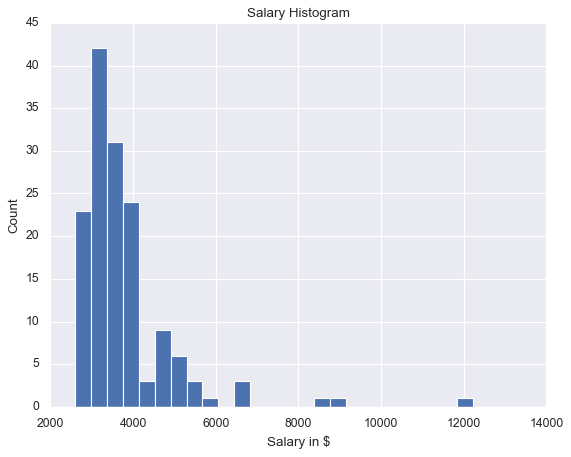

In [142]:
sns.set()
_ = plt.hist(df['salary'], bins=25)
_ = plt.xlabel('Salary in $')
_ = plt.ylabel('Count')
_ = plt.title('Salary Histogram')
plt.show() 

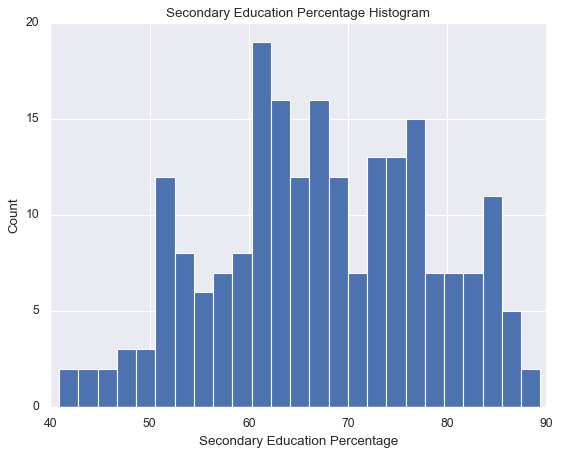

In [143]:
_ = plt.hist(df['ssc_p'], bins=25)
_ = plt.xlabel('Secondary Education Percentage')
_ = plt.ylabel('Count')
_ = plt.title('Secondary Education Percentage Histogram')
plt.show() 

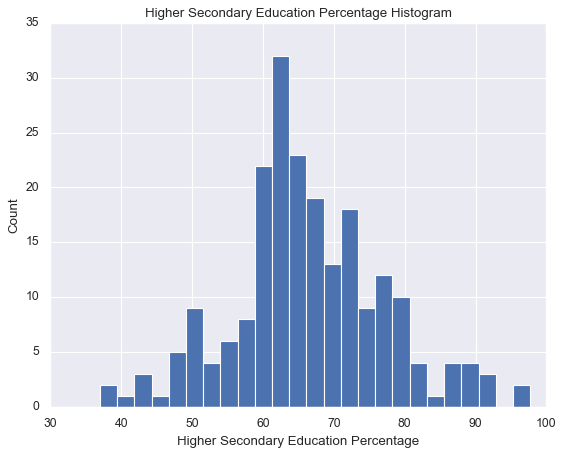

In [144]:
_ = plt.hist(df['hsc_p'], bins=25)
_ = plt.xlabel('Higher Secondary Education Percentage')
_ = plt.ylabel('Count')
_ = plt.title('Higher Secondary Education Percentage Histogram')
plt.show() 

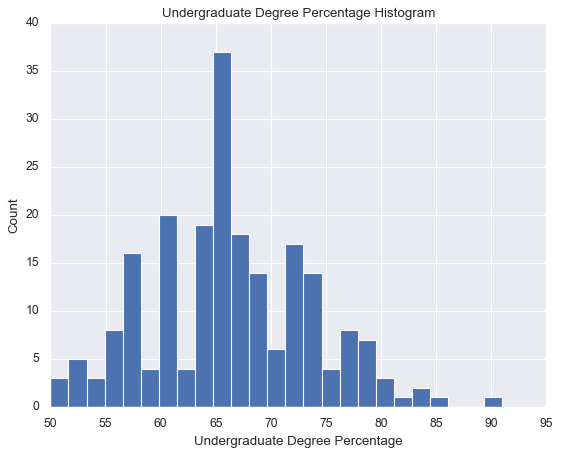

In [145]:
_ = plt.hist(df['degree_p'], bins=25)
_ = plt.xlabel('Undergraduate Degree Percentage')
_ = plt.ylabel('Count')
_ = plt.title('Undergraduate Degree Percentage Histogram')
plt.show() 

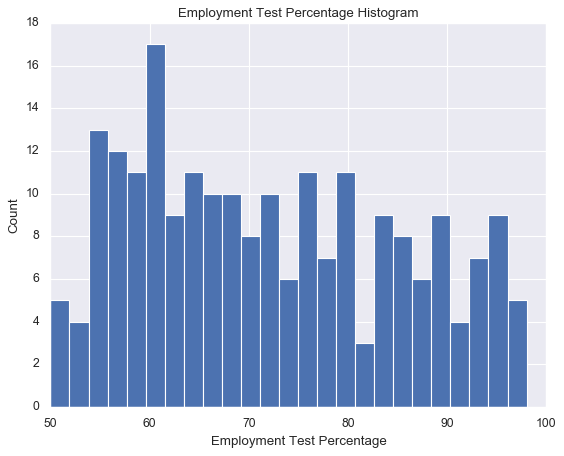

In [146]:
_ = plt.hist(df['etest_p'], bins=25)
_ = plt.xlabel('Employment Test Percentage')
_ = plt.ylabel('Count')
_ = plt.title('Employment Test Percentage Histogram')
plt.show() 

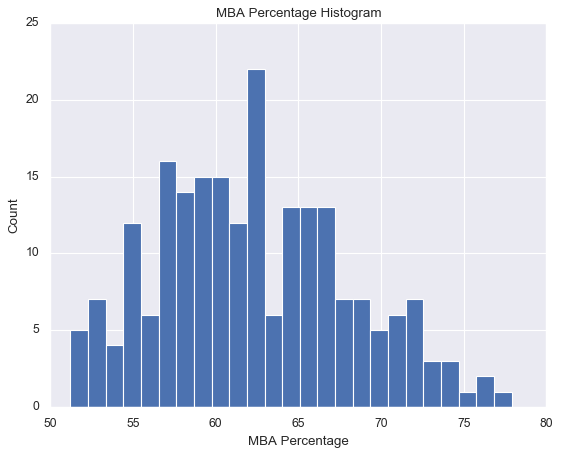

In [147]:
_ = plt.hist(df['mba_p'], bins=25)
_ = plt.xlabel('MBA Percentage')
_ = plt.ylabel('Count')
_ = plt.title('MBA Percentage Histogram')
plt.show() 

Swarmplots

C:\Users\Nic\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Nic\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


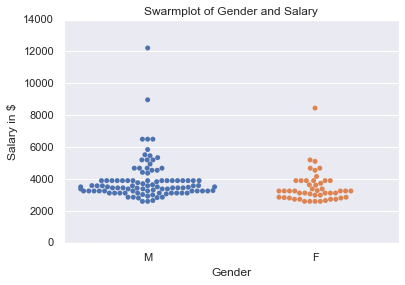

In [106]:
_ = sns.swarmplot(x='gender', y='salary', data=df)
_ = plt.xlabel('Gender')
_ = plt.ylabel('Salary in $')
_ = plt.title('Swarmplot of Gender and Salary')
plt.show()

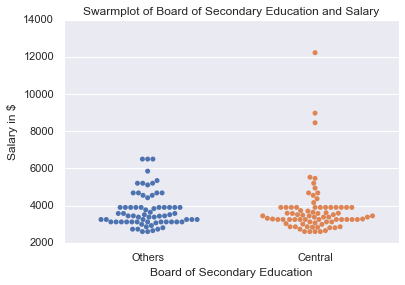

In [107]:
_ = sns.swarmplot(x='ssc_b', y='salary', data=df)
_ = plt.xlabel('Board of Secondary Education')
_ = plt.ylabel('Salary in $')
_ = plt.title('Swarmplot of Board of Secondary Education and Salary')
plt.show()

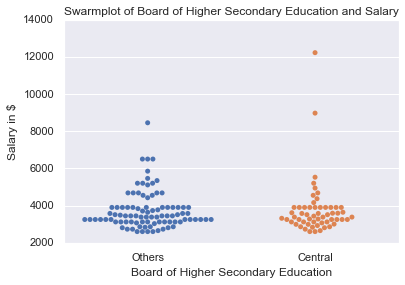

In [108]:
_ = sns.swarmplot(x='hsc_b', y='salary', data=df)
_ = plt.xlabel('Board of Higher Secondary Education')
_ = plt.ylabel('Salary in $')
_ = plt.title('Swarmplot of Board of Higher Secondary Education and Salary')
plt.show()

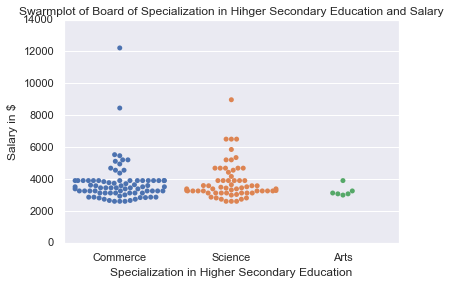

In [109]:
_ = sns.swarmplot(x='hsc_s', y='salary', data=df)
_ = plt.xlabel('Specialization in Higher Secondary Education')
_ = plt.ylabel('Salary in $')
_ = plt.title('Swarmplot of Board of Specialization in Hihger Secondary Education and Salary')
plt.show()

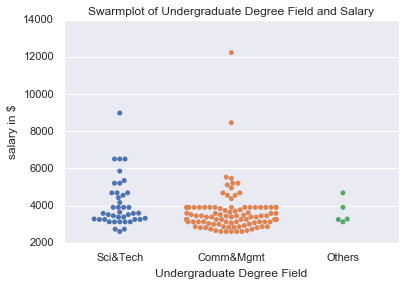

In [110]:
_ = sns.swarmplot(x='degree_t', y='salary', data=df)
_ = plt.xlabel('Undergraduate Degree Field')
_ = plt.ylabel('salary in $')
_ = plt.title('Swarmplot of Undergraduate Degree Field and Salary')
plt.show()

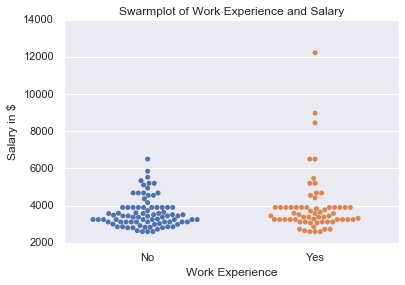

In [111]:
_ = sns.swarmplot(x='workex', y='salary', data=df)
_ = plt.xlabel('Work Experience')
_ = plt.ylabel('Salary in $')
_ = plt.title('Swarmplot of Work Experience and Salary')
plt.show()

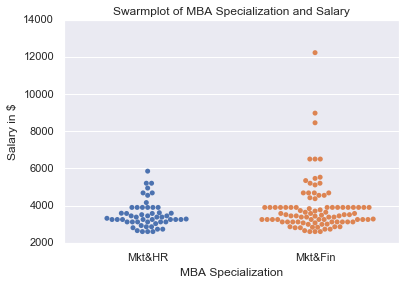

In [112]:
_ = sns.swarmplot(x='specialisation', y='salary', data=df)
_ = plt.xlabel('MBA Specialization')
_ = plt.ylabel('Salary in $')
_ = plt.title('Swarmplot of MBA Specialization and Salary')
plt.show()

## Statistical Analysis

Hypothesis Testing on difference in salary between categorical variables

In [135]:
df_clean_nonans = df_clean.dropna()
df_nonans = df.dropna()
df_clean_nonans.shape

(148, 16)

gender

In [114]:
male_df = df_clean_nonans[df_clean_nonans['gender_M'] == 1]
female_df = df_clean_nonans[df_clean_nonans['gender_M'] == 0]
# hypothesis testing salary means between male and female groups
print('Mean of salary for male: ', male_df['salary'].mean())
print('Mean of salary for female: ', female_df['salary'].mean())
print('Hypothesis test for difference between means: ')
print(stats.ttest_ind(male_df['salary'], female_df['salary']))

Mean of salary for male:  3885.83
Mean of salary for female:  3474.7916666666665
Hypothesis test for difference between means: 
Ttest_indResult(statistic=1.9448521615505516, pvalue=0.053714668806405554)


ssc_b

In [115]:
ssc_b_Others_df = df_clean_nonans[df_clean_nonans['ssc_b_Others'] == 1]
ssc_b_Central_df = df_clean_nonans[df_clean_nonans['ssc_b_Others'] == 0]
# hypothesis testing salary means between Others and Central groups
print('Mean of salary for Others: ', ssc_b_Others_df['salary'].mean())
print('Mean of salary for Central: ', ssc_b_Central_df['salary'].mean())
print('Hypothesis test for difference between means: ')
print(stats.ttest_ind(ssc_b_Others_df['salary'], ssc_b_Central_df['salary']))

Mean of salary for Others:  3759.6
Mean of salary for Central:  3746.1666666666665
Hypothesis test for difference between means: 
Ttest_indResult(statistic=0.06692931610519544, pvalue=0.9467295407874518)


hsc_b

In [116]:
hsc_b_Others_df = df_clean_nonans[df_clean_nonans['hsc_b_Others'] == 1]
hsc_b_Central_df = df_clean_nonans[df_clean_nonans['hsc_b_Others'] == 0]
# hypothesis testing salary means between Others and Central groups
print('Mean of salary for Others: ', hsc_b_Others_df['salary'].mean())
print('Mean of salary for Central: ', hsc_b_Central_df['salary'].mean())
print('Hypothesis test for difference between means: ')
print(stats.ttest_ind(hsc_b_Others_df['salary'], hsc_b_Central_df['salary']))

Mean of salary for Others:  3745.285714285714
Mean of salary for Central:  3764.0701754385964
Hypothesis test for difference between means: 
Ttest_indResult(statistic=-0.09122184544225741, pvalue=0.9274413548271774)


hsc_s

In [117]:
hsc_s_Com_df = df_nonans[df_nonans['hsc_s'] == 'Commerce']
hsc_s_Sci_df = df_nonans[df_nonans['hsc_s'] == 'Science']
hsc_s_Art_df = df_nonans[df_nonans['hsc_s'] == 'Arts']

# hypothesis testing salary means between Commerce and Science groups
print('Mean of salary for Commerce: ', hsc_s_Com_df['salary'].mean())
print('Mean of salary for Science: ', hsc_s_Sci_df['salary'].mean())
print('Hypothesis test for difference between means: ')
print(stats.ttest_ind(hsc_s_Com_df['salary'], hsc_s_Sci_df['salary']))
print()
# hypothesis testing salary means between Commerce and Arts groups
print('Mean of salary for Commerce: ', hsc_s_Com_df['salary'].mean())
print('Mean of salary for Arts: ', hsc_s_Art_df['salary'].mean())
print('Hypothesis test for difference between means: ')
print(stats.ttest_ind(hsc_s_Com_df['salary'], hsc_s_Art_df['salary']))
print()
# hypothesis testing salary means between Science and Arts groups
print('Mean of salary for Science: ', hsc_s_Sci_df['salary'].mean())
print('Mean of salary for Arts: ', hsc_s_Art_df['salary'].mean())
print('Hypothesis test for difference between means: ')
print(stats.ttest_ind(hsc_s_Sci_df['salary'], hsc_s_Art_df['salary']))

Mean of salary for Commerce:  3736.4303797468356
Mean of salary for Science:  3822.2063492063494
Hypothesis test for difference between means: 
Ttest_indResult(statistic=-0.4102884448701634, pvalue=0.68222156865267)

Mean of salary for Commerce:  3736.4303797468356
Mean of salary for Arts:  3232.6666666666665
Hypothesis test for difference between means: 
Ttest_indResult(statistic=0.9417798090868945, pvalue=0.3490384779982475)

Mean of salary for Science:  3822.2063492063494
Mean of salary for Arts:  3232.6666666666665
Hypothesis test for difference between means: 
Ttest_indResult(statistic=1.2384203806946261, pvalue=0.21988183557319033)


degree_t

In [118]:
degree_t_CM_df = df_nonans[df_nonans['degree_t'] == 'Comm&Mgmt']
degree_t_O_df = df_nonans[df_nonans['degree_t'] == 'Others']
degree_t_ST_df = df_nonans[df_nonans['degree_t'] == 'Sci&Tech']

# hypothesis testing salary means between Comm&Mgmt and Others groups
print('Mean of salary for Comm&Mgmt: ', degree_t_CM_df['salary'].mean())
print('Mean of salary for Others: ', degree_t_O_df['salary'].mean())
print('Hypothesis test for difference between means: ')
print(stats.ttest_ind(degree_t_CM_df['salary'], degree_t_O_df['salary']))
print()
# hypothesis testing salary means between Comm&Mgmt and Sci&Tech groups
print('Mean of salary for Comm&Mgmt: ', degree_t_CM_df['salary'].mean())
print('Mean of salary for Sci&Tech: ', degree_t_ST_df['salary'].mean())
print('Hypothesis test for difference between means: ')
print(stats.ttest_ind(degree_t_CM_df['salary'], degree_t_ST_df['salary']))
print()
# hypothesis testing salary means between Sci&Tech and Others groups
print('Mean of salary for Sci&Tech: ', degree_t_ST_df['salary'].mean())
print('Mean of salary for Others: ', degree_t_O_df['salary'].mean())
print('Hypothesis test for difference between means: ')
print(stats.ttest_ind(degree_t_ST_df['salary'], degree_t_O_df['salary']))

Mean of salary for Comm&Mgmt:  3622.156862745098
Mean of salary for Others:  3645.2
Hypothesis test for difference between means: 
Ttest_indResult(statistic=-0.04313075692071769, pvalue=0.9656792154031896)

Mean of salary for Comm&Mgmt:  3622.156862745098
Mean of salary for Sci&Tech:  4089.9268292682927
Hypothesis test for difference between means: 
Ttest_indResult(statistic=-2.0786256077393412, pvalue=0.03946403084269494)

Mean of salary for Sci&Tech:  4089.9268292682927
Mean of salary for Others:  3645.2
Hypothesis test for difference between means: 
Ttest_indResult(statistic=0.7476534084682858, pvalue=0.45864660838868276)


workex_Yes

In [119]:
workex_Y_df = df_clean_nonans[df_clean_nonans['workex_Yes'] == 1]
workex_N_df = df_clean_nonans[df_clean_nonans['workex_Yes'] == 0]
# hypothesis testing salary means between Work Experience and No Work Experience groups
print('Mean of salary for Work Experience: ', workex_Y_df['salary'].mean())
print('Mean of salary for No Work Experience: ', workex_N_df['salary'].mean())
print('Hypothesis test for difference between means: ')
print(stats.ttest_ind(workex_Y_df['salary'], workex_N_df['salary']))

Mean of salary for Work Experience:  3942.453125
Mean of salary for No Work Experience:  3607.809523809524
Hypothesis test for difference between means: 
Ttest_indResult(statistic=1.6701337722667704, pvalue=0.09703543621755682)


specialisation_Mkt&HR

In [120]:
MKHR_df = df_clean_nonans[df_clean_nonans['specialisation_Mkt&HR'] == 1]
MKFN_df = df_clean_nonans[df_clean_nonans['specialisation_Mkt&HR'] == 0]
# hypothesis testing salary means between Mkt&HR and Mkt&Fin groups
print('Mean of salary for Mkt&HR: ', MKHR_df['salary'].mean())
print('Mean of salary for Mkt&Fin: ', MKFN_df['salary'].mean())
print('Hypothesis test for difference between means: ')
print(stats.ttest_ind(MKHR_df['salary'], MKFN_df['salary']))

Mean of salary for Mkt&HR:  3514.9056603773583
Mean of salary for Mkt&Fin:  3885.084210526316
Hypothesis test for difference between means: 
Ttest_indResult(statistic=-1.790427661842333, pvalue=0.07545741069325944)


Linear Regression on salary variable

In [121]:
# functions needed for backward elimination

def train_model(variables):
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    return AIC_score(y_train, model.predict(X_train[variables]), model)

In [122]:
# train and testing split of data

features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'gender_M',
       'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce', 'hsc_s_Science',
       'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR']

X = df_clean_nonans[features]
y = df_clean_nonans['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=717)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(103, 14)
(45, 14)
(103,)
(45,)


In [123]:
# run backward elimination
best_model, best_variables = backward_elimination(X_train.columns, train_model, score_model, verbose=True)

print(best_variables)
print(regressionSummary(y_test, best_model.predict(X_test[best_variables])))

Variables: ssc_p, hsc_p, degree_p, etest_p, mba_p, gender_M, ssc_b_Others, hsc_b_Others, hsc_s_Commerce, hsc_s_Science, degree_t_Others, degree_t_Sci&Tech, workex_Yes, specialisation_Mkt&HR
Start: score=1791.67
Step: score=1789.70, remove etest_p
Step: score=1787.76, remove specialisation_Mkt&HR
Step: score=1785.95, remove ssc_b_Others
Step: score=1784.16, remove degree_t_Others
Step: score=1782.40, remove hsc_s_Science
Step: score=1780.58, remove hsc_b_Others
Step: score=1779.57, remove degree_p
Step: score=1778.57, remove hsc_p
Step: score=1778.34, remove ssc_p
Step: score=1778.28, remove workex_Yes
Step: score=1778.28, remove None
['mba_p', 'gender_M', 'hsc_s_Commerce', 'degree_t_Sci&Tech']

Regression statistics

                      Mean Error (ME) : -349.6807
       Root Mean Squared Error (RMSE) : 832.5384
            Mean Absolute Error (MAE) : 684.3140
          Mean Percentage Error (MPE) : -13.0372
Mean Absolute Percentage Error (MAPE) : 20.2176
None


In [124]:
# show full model results with statsmodels

train_df = X_train.join(y_train)
train_df.rename(columns={"degree_t_Sci&Tech": "degree_t_SciTech"}, inplace=True)
best_variables = ['mba_p', 'gender_M', 'hsc_s_Commerce', 'degree_t_SciTech']
formula = 'salary ~ ' + ' + '.join(best_variables)

lm = sm.ols(formula=formula, data=train_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     3.636
Date:                Wed, 06 May 2020   Prob (F-statistic):            0.00833
Time:                        19:46:07   Log-Likelihood:                -883.14
No. Observations:                 103   AIC:                             1776.
Df Residuals:                      98   BIC:                             1789.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -429.8484   1535.168     -0.280      0.780   -3476.339    2616.642
mba_p               55.3856     23.765      2.331      0.022       8.224     102.547
gender_M           488.6161    297.708      1.641      0.104    -102.176    1079.408
hsc_s_Commerce     519.8344    351.693      1.478      0.143    -178.088    1217.757
degree_t_SciTech   776.3383    391.105      1.985      0.050       0.203    1552.474
==============================================================================
Omnibus:                      104.271   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1303.826
Skew:                           3.373   Prob(JB):                    7.55e-284
Kurtosis:                      19.072   Cond. No.                         748.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

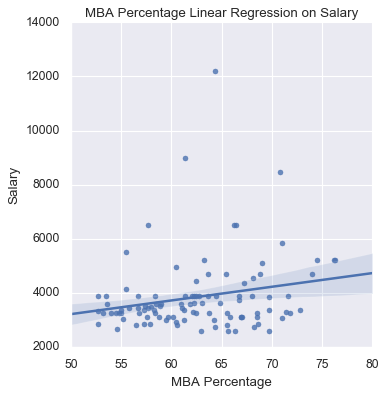

In [148]:
sns.lmplot(x='mba_p', y='salary', data=train_df)
plt.xlabel('MBA Percentage')
plt.ylabel('Salary')
plt.title('MBA Percentage Linear Regression on Salary')
plt.show()

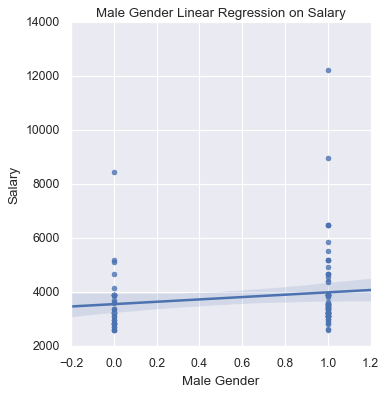

In [149]:
sns.lmplot(x='gender_M', y='salary', data=train_df)
plt.xlabel('Male Gender')
plt.ylabel('Salary')
plt.title('Male Gender Linear Regression on Salary')
plt.show()

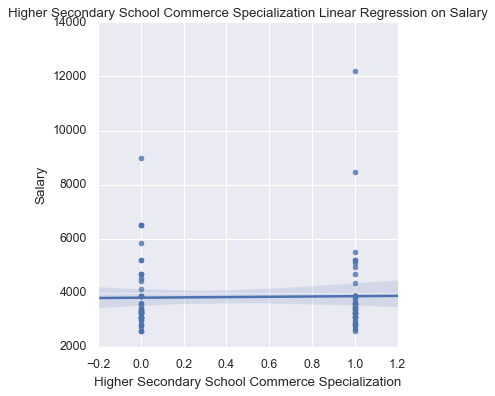

In [150]:
sns.lmplot(x='hsc_s_Commerce', y='salary', data=train_df)
plt.xlabel('Higher Secondary School Commerce Specialization')
plt.ylabel('Salary')
plt.title('Higher Secondary School Commerce Specialization Linear Regression on Salary')
plt.show()

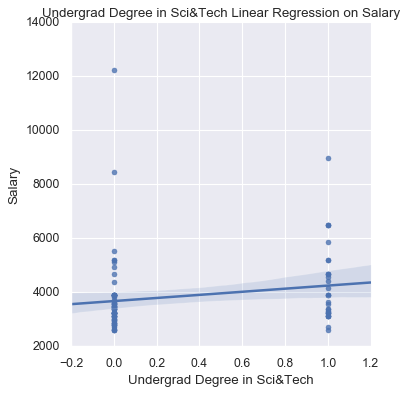

In [151]:
sns.lmplot(x='degree_t_SciTech', y='salary', data=train_df)
plt.xlabel('Undergrad Degree in Sci&Tech')
plt.ylabel('Salary')
plt.title('Undergrad Degree in Sci&Tech Linear Regression on Salary')
plt.show()

## Machine Learning Task - Classification of 'status_Placed' Variable

Decision Tree

In [129]:
features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'gender_M',
       'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce', 'hsc_s_Science',
       'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR']

X = df_clean[features]
y = df_clean['status_Placed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=717)

In [153]:
# Decision tree
tree = DecisionTreeClassifier(criterion='gini', random_state=717, max_depth=4, min_samples_leaf=5)
tree.fit(X_train, y_train)

# predict
y_pred = tree.predict(X_test)

# evaluate
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("Accuracy")
print(accuracy_score(y_test, y_pred) * 100)

print("Report")
print(classification_report(y_test, y_pred))

# feature importance top 10
feature_imp = pd.Series(tree.feature_importances_, index=features).sort_values(ascending=False)
print('Feature Importance')
print(feature_imp)

Confusion Matrix
[[13  4]
 [ 8 40]]
Accuracy
81.53846153846153
Report
              precision    recall  f1-score   support

           0       0.62      0.76      0.68        17
           1       0.91      0.83      0.87        48

    accuracy                           0.82        65
   macro avg       0.76      0.80      0.78        65
weighted avg       0.83      0.82      0.82        65

Feature Importance
ssc_p                    0.536245
hsc_p                    0.197759
mba_p                    0.180012
degree_p                 0.085984
specialisation_Mkt&HR    0.000000
workex_Yes               0.000000
degree_t_Sci&Tech        0.000000
degree_t_Others          0.000000
hsc_s_Science            0.000000
hsc_s_Commerce           0.000000
hsc_b_Others             0.000000
ssc_b_Others             0.000000
gender_M                 0.000000
etest_p                  0.000000
dtype: float64


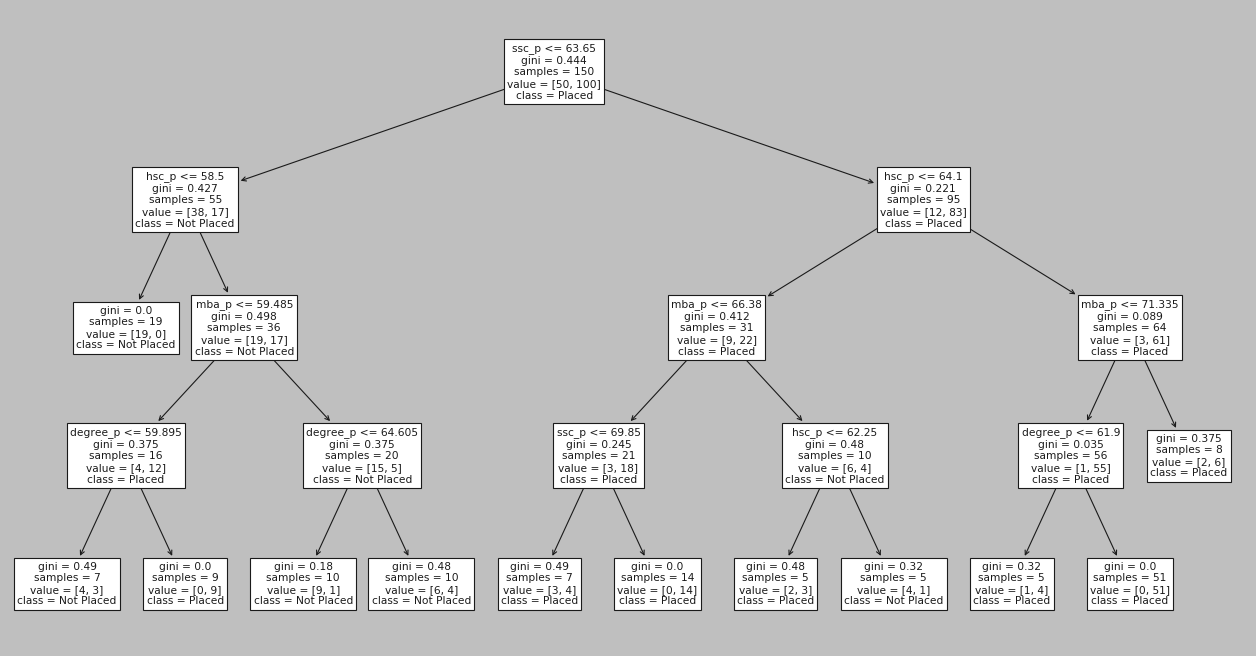

In [131]:
# draw decision tree
plt.style.use('classic')
label_names = {1: 'Placed', 0: 'Not Placed'}
fig = plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=label_names)
plt.show()